In [78]:
# Importing necessary libraries
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [80]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

In [81]:
# Use only a subset of the data
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]


# Function to perform Grid Search for SVM
def train_svm(kernel_type):
    svm_clf = SVC(kernel=kernel_type)

    if kernel_type == 'poly':
        param_grid = {
            'C': [0.1, 1, 10],
            'degree': [2, 3],
            'coef0': [0, 1]
        }
    elif kernel_type == 'rbf':
        param_grid = {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 0.001, 0.0001]
        }
    else:
        param_grid = {'C': [0.1, 1, 10]}

    grid_search = GridSearchCV(svm_clf, param_grid, cv=5, verbose=2, n_jobs=-1)
    grid_search.fit(X_train_small, y_train_small)
    return grid_search.best_estimator_, grid_search.best_params_

In [82]:
svm_linear, params_linear = train_svm('linear')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
svm_poly, params_poly = train_svm('poly')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
svm_rbf, params_rbf = train_svm('rbf')

In [ ]:
# Evaluate the models
def evaluate_model(model, X_test, y_test, model_name):
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    train_time = end_time - start_time

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Training Time: {train_time:.4f} seconds\n")

    return accuracy, precision, recall, f1, train_time

In [61]:
# Compare SVM with KNN, SGD, and Random Forest
knn_clf = KNeighborsClassifier(n_neighbors=3)
sgd_clf = SGDClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [63]:
# Train all models
knn_clf.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
# Evaluate all models
results = {}
results['SVM Linear'] = evaluate_model(svm_linear, X_test, y_test, "SVM Linear")
results['SVM Polynomial'] = evaluate_model(svm_poly, X_test, y_test, "SVM Polynomial")
results['SVM RBF'] = evaluate_model(svm_rbf, X_test, y_test, "SVM RBF")
results['KNN'] = evaluate_model(knn_clf, X_test, y_test, "KNN")
results['SGD'] = evaluate_model(sgd_clf, X_test, y_test, "SGD")
results['Random Forest'] = evaluate_model(rf_clf, X_test, y_test, "Random Forest")

Model: SVM Linear
Accuracy: 0.9096
Precision: 0.9097
Recall: 0.9096
F1-Score: 0.9094
Training Time: 22.9492 seconds

Model: SVM Polynomial
Accuracy: 0.9631
Precision: 0.9631
Recall: 0.9631
F1-Score: 0.9631
Training Time: 23.2241 seconds

Model: SVM RBF
Accuracy: 0.9678
Precision: 0.9678
Recall: 0.9678
F1-Score: 0.9678
Training Time: 54.5550 seconds

Model: KNN
Accuracy: 0.9713
Precision: 0.9714
Recall: 0.9713
F1-Score: 0.9712
Training Time: 59.4358 seconds

Model: SGD
Accuracy: 0.8717
Precision: 0.8804
Recall: 0.8717
F1-Score: 0.8721
Training Time: 0.3970 seconds

Model: Random Forest
Accuracy: 0.9673
Precision: 0.9673
Recall: 0.9673
F1-Score: 0.9673
Training Time: 1.5705 seconds



In [65]:
# Plotting the results
def plot_comparison(results):
    models = list(results.keys())
    accuracies = [results[m][0] for m in models]
    precisions = [results[m][1] for m in models]
    recalls = [results[m][2] for m in models]
    f1_scores = [results[m][3] for m in models]
    times = [results[m][4] for m in models]

In [66]:
# Plotting the results
def plot_comparison(results):
    models = list(results.keys())
    accuracies = [results[m][0] for m in models]
    precisions = [results[m][1] for m in models]
    recalls = [results[m][2] for m in models]
    f1_scores = [results[m][3] for m in models]
    times = [results[m][4] for m in models]

    # Plot Accuracy, Precision, Recall, F1-Score
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.bar(models, accuracies, color='blue')
    plt.title('Accuracy')

    plt.subplot(2, 2, 2)
    plt.bar(models, precisions, color='orange')
    plt.title('Precision')

    plt.subplot(2, 2, 3)
    plt.bar(models, recalls, color='green')
    plt.title('Recall')

    plt.subplot(2, 2, 4)
    plt.bar(models, f1_scores, color='red')
    plt.title('F1-Score')

    plt.tight_layout()
    plt.show()

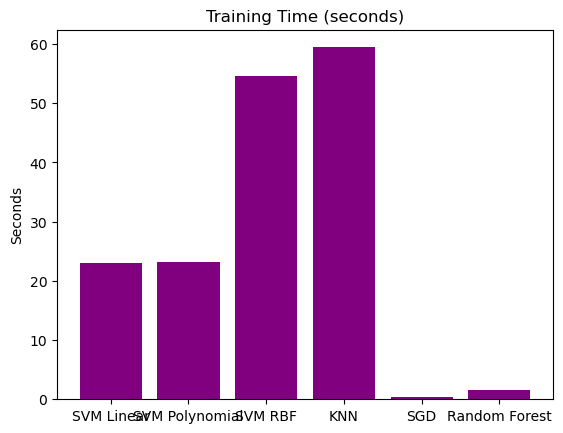

In [90]:
    # Plot Training Times
    model = list(results.keys())
    times = [results[m][4] for m in models]
    def evaluate_model(model, X_test, y_test, model_name):
        plt.figure(figsize=(8, 6))
    plt.bar(models, times, color='purple')
    plt.title('Training Time (seconds)')
    plt.ylabel('Seconds')
    plt.show()

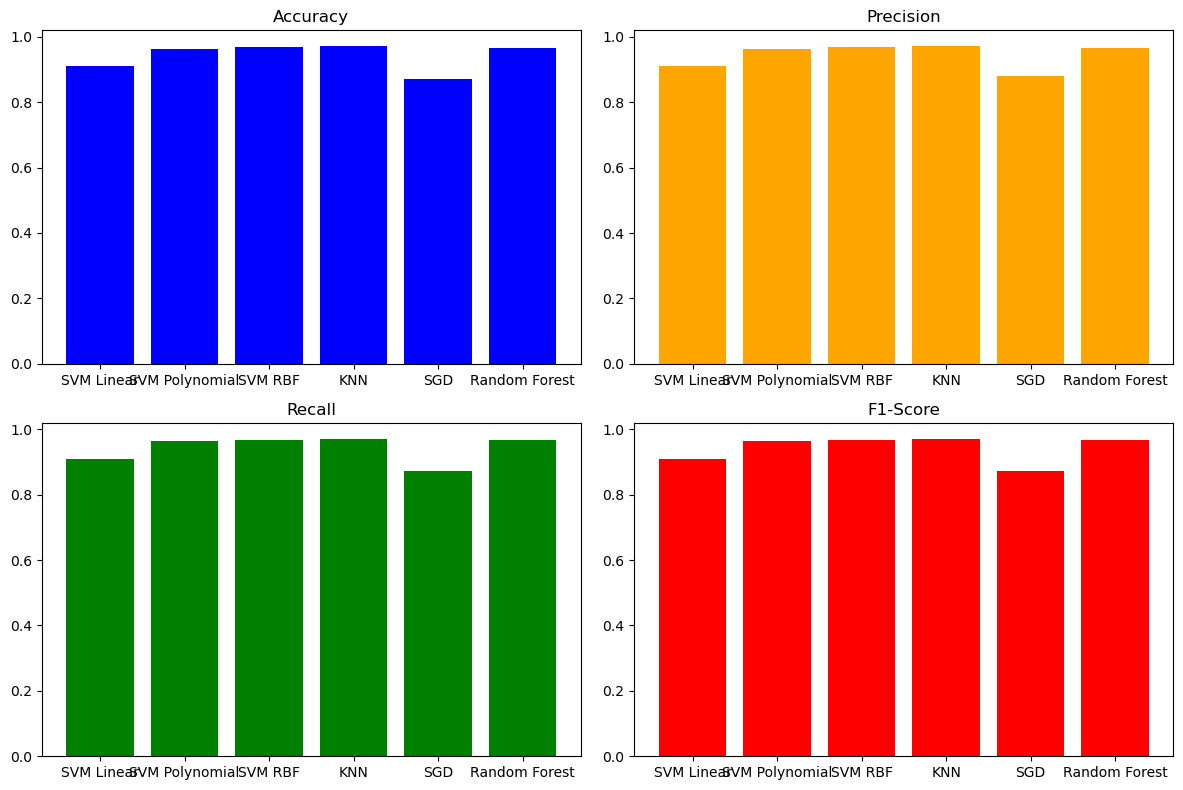

In [92]:
# Plot comparison results
plot_comparison(results)